# <div style="text-align: center;"><u>**Fast food EDA - Aitor Pérez**</u></div>

### **#️⃣ Descripción del proyecto**
Este análisis exploratorio de datos (EDA) tiene como objetivo explorar un dataset de comida rápida para analizar y comparar aspectos nutricionales, como calorías, grasas, sodio y su relación con otras variables. El análisis busca identificar patrones, comparar cadenas de comida rápida en términos de salud nutricional, y resaltar productos extremos (altos o bajos en nutrientes). Los resultados ofrecerán insights prácticos para los consumidores.

### **🎯 Objetivo del Proyecto**
1. Analizar las calorías promedio por cadena y destacar qué cadenas ofrecen productos más o menos calóricos.
2. Analizar correlaciones entre calorías, sodio y azúcares para identificar patrones nutricionales.
3. Evaluar cómo las grasas saturadas y otros nutrientes impactan en los niveles de colesterol.
4. Identificar productos con el mejor balance nutricional (bajas calorías, grasas y sodio) y destacar opciones saludables.
5. Utilizar los puntos de [Weight Watchers Points](https://www.weightwatchers.com/us/) para evaluar la salud percibida de los productos y su alineación con dietas saludables.

### **🧷 Importación de librerías**

In [1]:
# Cargar librerias necesarias
import sys
sys.path.append('./src/utils')  # Añadir el path de la carpeta al sistema

from funciones import *  # Importar la función específica
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Definir configuraciones generales y colores
sns.set_theme(style='white', palette='colorblind')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
gcolors = {'oscuro': '#1e35a1', 'medio': '#0c79f3', 'claro': '#59a7ff'}

# Ignorar mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar datos y mostrar las primeras filas
df = pd.read_csv('./src/data/fastfood.csv')
df.head(10)

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502
5,McDonald’s,Double Quarter Pounder® with Cheese,740,380,42,19,2.5,155,1380,40,3,9,48,720
6,McDonald’s,Big Mac®,540,260,29,10,1.5,75,1040,45,3,9,25,534
7,McDonald’s,Big N’ Tasty®,460,220,24,8,1.5,70,720,37,3,8,24,452
8,McDonald’s,Big N’ Tasty® with Cheese,510,250,28,11,1.5,85,960,38,3,8,27,502
9,McDonald’s,Angus Bacon & Cheese,790,350,39,17,2,145,2070,63,4,13,45,775


In [3]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1147 non-null   object
 1   Item                  1147 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from
Fat     642 non-null    object
 4   Total Fat
(g)         1091 non-null   object
 5   Saturated Fat
(g)     1091 non-null   object
 6   Trans Fat
(g)         1091 non-null   object
 7   Cholesterol
(mg)      1147 non-null   object
 8   Sodium 
(mg)          1147 non-null   object
 9   Carbs
(g)             1091 non-null   object
 10  Fiber
(g)             1091 non-null   object
 11  Sugars
(g)            1147 non-null   object
 12  Protein
(g)           1091 non-null   object
 13  Weight Watchers
Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.6+ KB


### **🧹 Limpieza de datos**

Viendo la estructura de las columnas, voy limpiarlas y aprovechar para pasarlas a castellano.

In [4]:
# Diccionario con los nombres en inglés y su equivalente "limpio" en castellano
columnas = {
    'Company': 'cadena',
    'Item': 'producto',
    'Calories': 'calorias',
    'Calories from\nFat': 'calorias_grasa',
    'Total Fat\n(g)': 'grasa',
    'Saturated Fat\n(g)': 'grasa_saturada',
    'Trans Fat\n(g)': 'grasa_trans',
    'Cholesterol\n(mg)': 'colesterol',
    'Sodium \n(mg)': 'sodio',
    'Carbs\n(g)': 'carbohidratos',
    'Fiber\n(g)': 'fibra',
    'Sugars\n(g)': 'azucares',
    'Protein\n(g)': 'proteina',
    'Weight Watchers\nPnts': 'puntos_ww'
}

# Renombrar las columnas usando el diccionario
df = df.rename(columns=columnas)

# Verificar los cambios
df.head()

,cadena,producto,calorias,calorias_grasa,grasa,grasa_saturada,grasa_trans,colesterol,sodio,carbohidratos,fibra,azucares,proteina,puntos_ww
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [5]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cadena          1147 non-null   object
 1   producto        1147 non-null   object
 2   calorias        1147 non-null   object
 3   calorias_grasa  642 non-null    object
 4   grasa           1091 non-null   object
 5   grasa_saturada  1091 non-null   object
 6   grasa_trans     1091 non-null   object
 7   colesterol      1147 non-null   object
 8   sodio           1147 non-null   object
 9   carbohidratos   1091 non-null   object
 10  fibra           1091 non-null   object
 11  azucares        1147 non-null   object
 12  proteina        1091 non-null   object
 13  puntos_ww       887 non-null    object
dtypes: object(14)
memory usage: 125.6+ KB


Viendo la cantidad de `Dtype` = `object` que hay cuando deberían ser floats, decido cambiarles el tipo para que el análisis sea más preciso.

In [6]:
# Reemplazar valores no numéricos por NaN, hacer strip y luego convertir a numérico en el mismo loop
for col in df.columns[2:]:  # Empieza desde la tercera columna
    # Convertir la columna a numérico, en caso de no poder, será nulo, lo que me permite hacer el fillna posterior
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
# Revisar valores nulos
df.isnull().sum()

cadena              0
producto            0
calorias           14
calorias_grasa    517
grasa              68
grasa_saturada     68
grasa_trans        68
colesterol         28
sodio              15
carbohidratos      69
fibra              83
azucares           29
proteina           68
puntos_ww         271
dtype: int64

Antes de limpiar, voy a borrar duplicados y quitar espacios que puedan causar conflictos

In [8]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Limpiar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

Después de revisar los valores nulos, decido calcular `calorias_grasa`, eliminar los productos sin calorías (ya que no tienen contenido en las demás filas), rellenar los valores nulos restantes con 0 y luego calcular los `Weight Watchers points` utilizando su fórmula. Ambas columnas se pueden calcular si las filas tienen los datos necesarios.

In [9]:
# Calcular calorías_grasa solo si la columna 'grasa' no tiene valores nulos
df['calorias_grasa'] = df['grasa'].apply(lambda x: x * 9 if pd.notnull(x) else 0)

# Borramos las filas que no tengan valores en la columna 'calorias'
df = df.dropna(subset=['calorias'])

# Rellenamos los valores nulos de las columnas restantes con 0, suponiendo que las demás columnas son 0 si no se especifica
df = df.fillna(0)

# Intentar identificar bebidas y complementos
palabras_bebidas = ['coffee', 'tea', 'latte', 'ketchup', 'dressing', 'cappuccino', 'soda', 'cola', 'juice', 'water', 'cream', 'shake', 'milk', 'mocha', 'lemonade', 'iced', 'equal', 'pepsi', 'coke', 'dr pepper', 'packet', 'diet', 'fl oz', 'splenda']
filtro_palabras_bebidas = df['producto'].str.lower().str.contains('|'.join(palabras_bebidas))
filtro_nutricional_bebidas = (
    (df['calorias'] < 100) &          # Calorías bajas
    (df['grasa'] == 0) &              # Sin grasas
    (df['proteina'] <= 2) &           # Baja proteína
    (df['carbohidratos'] >= 10)       # Carbohidratos significativos
)
df['complemento'] = (filtro_nutricional_bebidas | filtro_palabras_bebidas).astype(int)

# Ahora calculamos los puntos_ww usando la fórmula
df['puntos_ww'] = (df['calorias'] + (0.3 * df['grasa']) - (0.2 * df['fibra'])) / 50

In [10]:
# Revisar nuevamente valores nulos para asegurarnos que el dataset está limpio
df.isnull().sum()

cadena            0
producto          0
calorias          0
calorias_grasa    0
grasa             0
grasa_saturada    0
grasa_trans       0
colesterol        0
sodio             0
carbohidratos     0
fibra             0
azucares          0
proteina          0
puntos_ww         0
complemento       0
dtype: int64

In [11]:
# Ordenar el DataFrame por la columna 'calorias' en orden descendente y mostrar un resumen de las columnas numéricas
df = df.sort_values(by='calorias', ascending=False)
df.select_dtypes(include=['number']).describe()

,calorias,calorias_grasa,grasa,grasa_saturada,grasa_trans,colesterol,sodio,carbohidratos,fibra,azucares,proteina,puntos_ww,complemento
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000
mean,287.908526,100.298845,11.144316,3.882327,0.134103,40.235346,428.096803,37.151865,1.371226,23.831261,8.978686,5.819552,0.489343
std,222.662374,124.923919,13.880435,4.992319,0.480047,67.979164,497.936655,32.062093,2.347732,32.346265,10.999858,4.518637,0.500109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,14.000000,0.000000,2.000000,0.000000,2.807250,0.000000
50%,240.000000,63.000000,7.000000,2.500000,0.000000,20.000000,190.000000,33.000000,0.000000,8.000000,6.000000,4.864000,0.000000
75%,390.000000,153.000000,17.000000,6.000000,0.000000,50.000000,680.000000,51.000000,2.000000,39.750000,13.000000,7.975000,1.000000
max,1220.000000,882.000000,98.000000,33.000000,4.500000,575.000000,2890.000000,270.000000,31.000000,264.000000,71.000000,24.884000,1.000000


In [12]:
df.to_csv('./src/data/clean.csv', index=False)

### **📋 Tabla de variables**

| **Variable**       | **Definición**                                              | **Tipo**    | **Prioridad** | **Nota** |
|--------------------|-------------------------------------------------------------|-------------|---------------|----------|
| `cadena`           | Nombre de la cadena de comida rápida                        | Categórica  | 0             | Diferencias entre cadenas. |
| `producto`         | Nombre del producto                                         | Categórica  | 2             | Identifica productos específicos. |
| `calorias`         | Cantidad total de calorías del producto                     | Numérica    | 0             | Densidad calórica. |
| `calorias_grasa`   | Calorías que provienen de las grasas                        | Numérica    | 2             | Proporción de calorías grasas. |
| `grasa`            | Grasa total en gramos                                       | Numérica    | 0             | Impacto en la salud. |
| `grasa_saturada`   | Grasa saturada en gramos                                    | Numérica    | 0             | Asociada a colesterol. |
| `grasa_trans`      | Grasa trans en gramos                                       | Numérica    | 1             | Baja frecuencia, alto riesgo. |
| `colesterol`       | Colesterol en miligramos                                    | Numérica    | 0             | Relación con salud cardiovascular. |
| `sodio`            | Sodio en miligramos                                         | Numérica    | 0             | Indicador clave en salinidad. |
| `carbohidratos`    | Carbohidratos en gramos                                     | Numérica    | 1             | Aporte energético. |
| `fibra`            | Fibra dietética en gramos                                   | Numérica    | 1             | Mejora calidad nutricional. |
| `azucares`         | Azúcares en gramos                                          | Numérica    | 0             | Importante para dietas bajas en azúcar. |
| `proteina`         | Proteína en gramos                                          | Numérica    | 1             | Nutrición positiva. |
| `puntos_ww`        | Puntos Weight Watchers del producto                         | Numérica    | 0             | Percepción de salud. |

### **💹 Visualización de los datos**

#### Conclusión: Distribución de calorías por cadena

- Gráfico Superior - Distribución de Calorías:
	- La mayoría de los productos están entre 100 y 400 kcal, con un pico cercano a las 200 kcal.
	- La media global es de 288 kcal (línea verde), mientras que la mediana es de 240 kcal (línea roja).
	- La distribución es asimétrica hacia la derecha, con productos que llegan hasta 1200 kcal, influyendo en el promedio.

- Gráfico Inferior - Promedio de Calorías por Cadena:
	- Burger King (366 kcal) y Wendy’s (322 kcal) superan notablemente la media global.
	- KFC tiene el promedio más bajo con 215 kcal, seguido de Pizza Hut (253 kcal).
	- La línea azul representa la media global de 288 kcal como referencia para comparar cadenas.

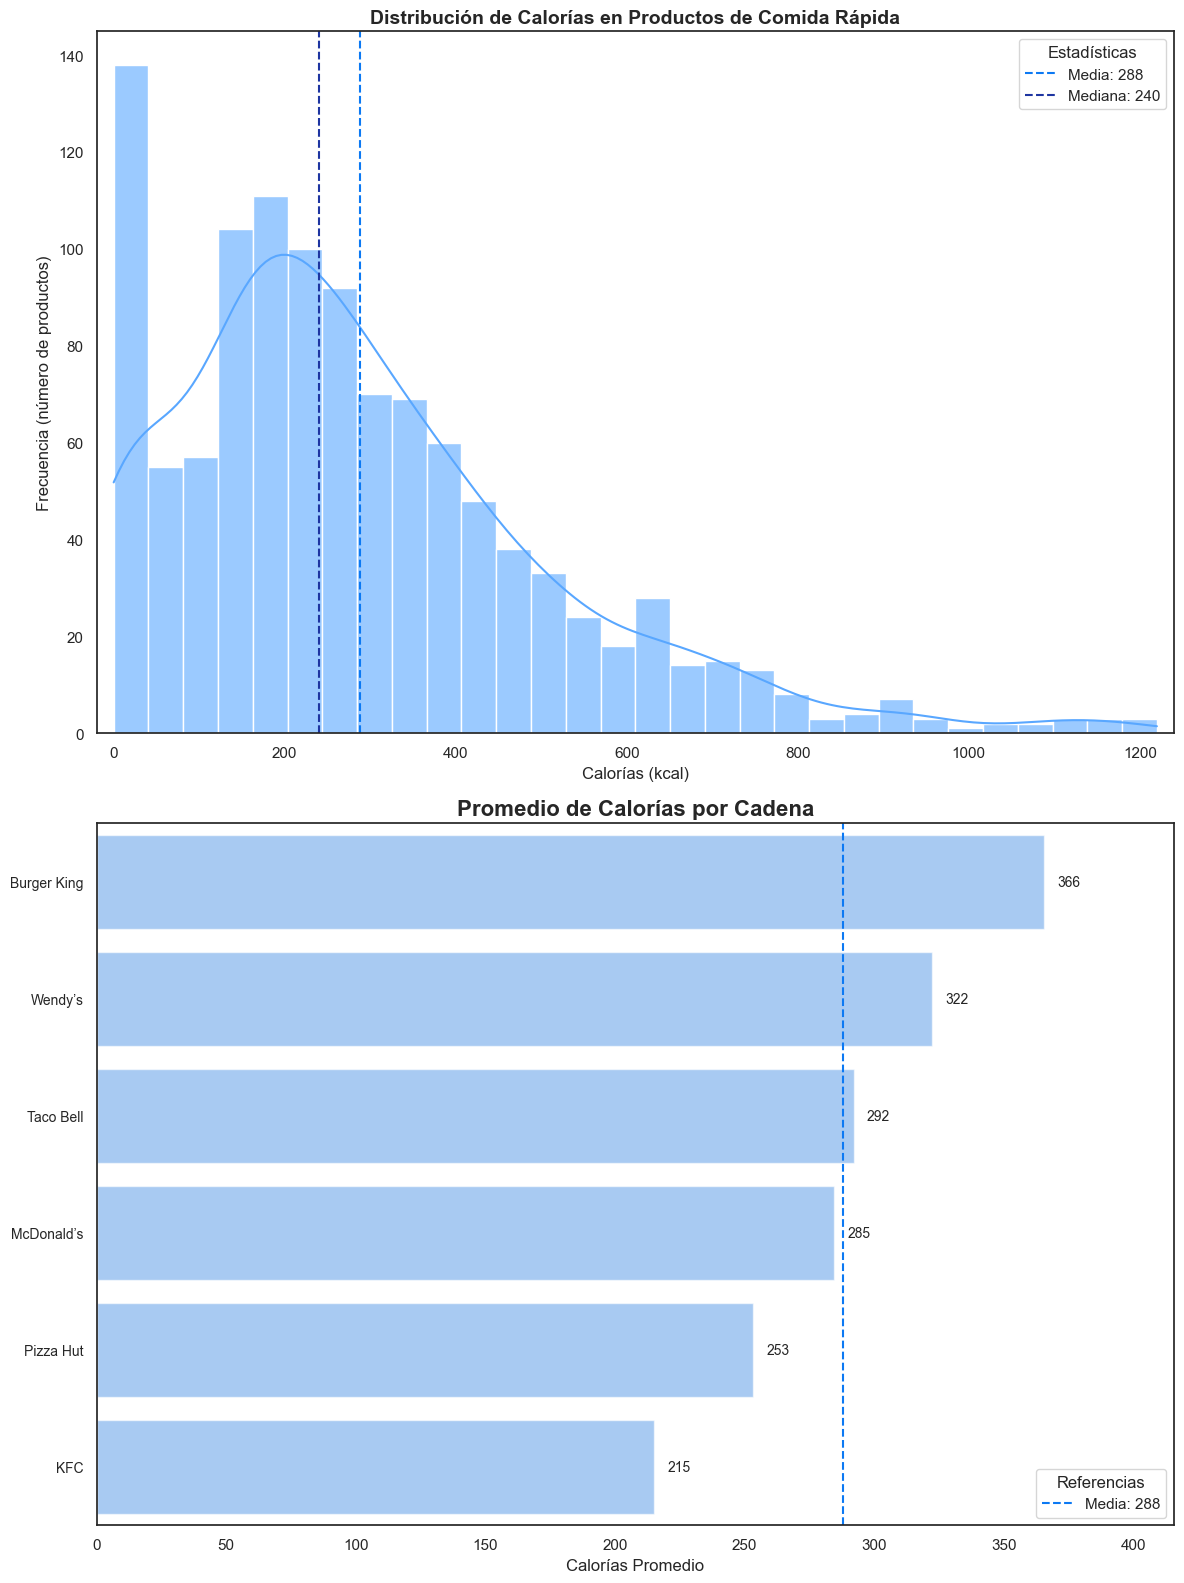

In [13]:
# Resumen Visual de las Calorías (Con Mejoras)
fig, axs = plt.subplots(2, 1, figsize=(12, 16))

# Histograma con KDE
sns.histplot(
    df['calorias'], 
    bins=30, 
    kde=True, 
    color=gcolors['claro'], 
    alpha=0.6, 
    ax=axs[0]
)

# Agregar líneas de referencia para la media y la mediana
axs[0].axvline(df['calorias'].mean(), color=gcolors['medio'], linestyle='--', linewidth=1.5, label=f'Media: {round(df["calorias"].mean())}')
axs[0].axvline(df['calorias'].median(), color=gcolors['oscuro'], linestyle='--', linewidth=1.5, label=f'Mediana: {round(df["calorias"].median())}')

axs[0].set_xlim(-20, df['calorias'].max() + 20)

# Títulos y etiquetas
axs[0].set_title('Distribución de Calorías en Productos de Comida Rápida', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Calorías (kcal)', fontsize=12)
axs[0].set_ylabel('Frecuencia (número de productos)', fontsize=12)

# Leyenda
axs[0].legend(title='Estadísticas', loc='upper right')

# Calcular promedio global de calorías
calorias_media_global = df['calorias'].mean()

# Promedio de calorías por cadena
calorias_por_cadena = df.groupby('cadena')['calorias'].mean().sort_values(ascending=False)

# Crear el gráfico de barras en el segundo eje
sns.barplot(
	x=calorias_por_cadena.values, 
	y=calorias_por_cadena.index, 
	color=gcolors['claro'], 
	alpha=0.6,
	ax=axs[1],
	orient='h'
)

# Añadir línea de referencia para la media global
axs[1].axvline(calorias_media_global, color=gcolors['medio'], linestyle='--', linewidth=1.5, label=f'Media: {round(calorias_media_global)}')

# Etiquetas encima de las barras con margen ajustado
for i, valor in enumerate(calorias_por_cadena.values):
	axs[1].text(valor + 5, i, f'{round(valor)}', va='center', fontsize=10)

# Ajustar el rango del eje X para incluir margen
axs[1].set_xlim(0, calorias_por_cadena.max() + 50)

# Títulos y etiquetas
axs[1].set_title('Promedio de Calorías por Cadena', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Calorías Promedio', fontsize=12)
axs[1].set_ylabel('', fontsize=12)
axs[1].tick_params(axis='y', labelsize=10)
axs[1].legend(loc='lower right', title='Referencias')

# Ajustar diseño y mostrar el gráfico y guardar imagen
plt.tight_layout()
plt.savefig("./src/img/distribucion_calorias.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusión: Calorías vs Sodio & Azucares

1. Relación entre calorías y sodio:
	- Existe una correlación fuerte y positiva de 0.73 entre las calorías y el contenido de sodio.
	- A medida que aumentan las calorías, el contenido de sodio también tiende a incrementarse de forma considerable.
	- La distribución del sodio muestra una gran variabilidad, con varios valores atípicos que superan los 2,500 mg, lo cual puede representar un riesgo para la salud, especialmente en dietas con alto contenido calórico.
	- 
2. Relación entre calorías y azúcares:
	- La correlación entre calorías y azúcares es más débil (0.26) en comparación con el sodio.
	- Aunque existe una ligera tendencia al aumento de azúcares con el incremento de calorías, la variabilidad es menor y los datos muestran menos dependencia lineal.
	- La distribución de azúcares es asimétrica, con algunos valores extremos que superan los 250 g, pero la mayoría de los productos contienen niveles moderados.

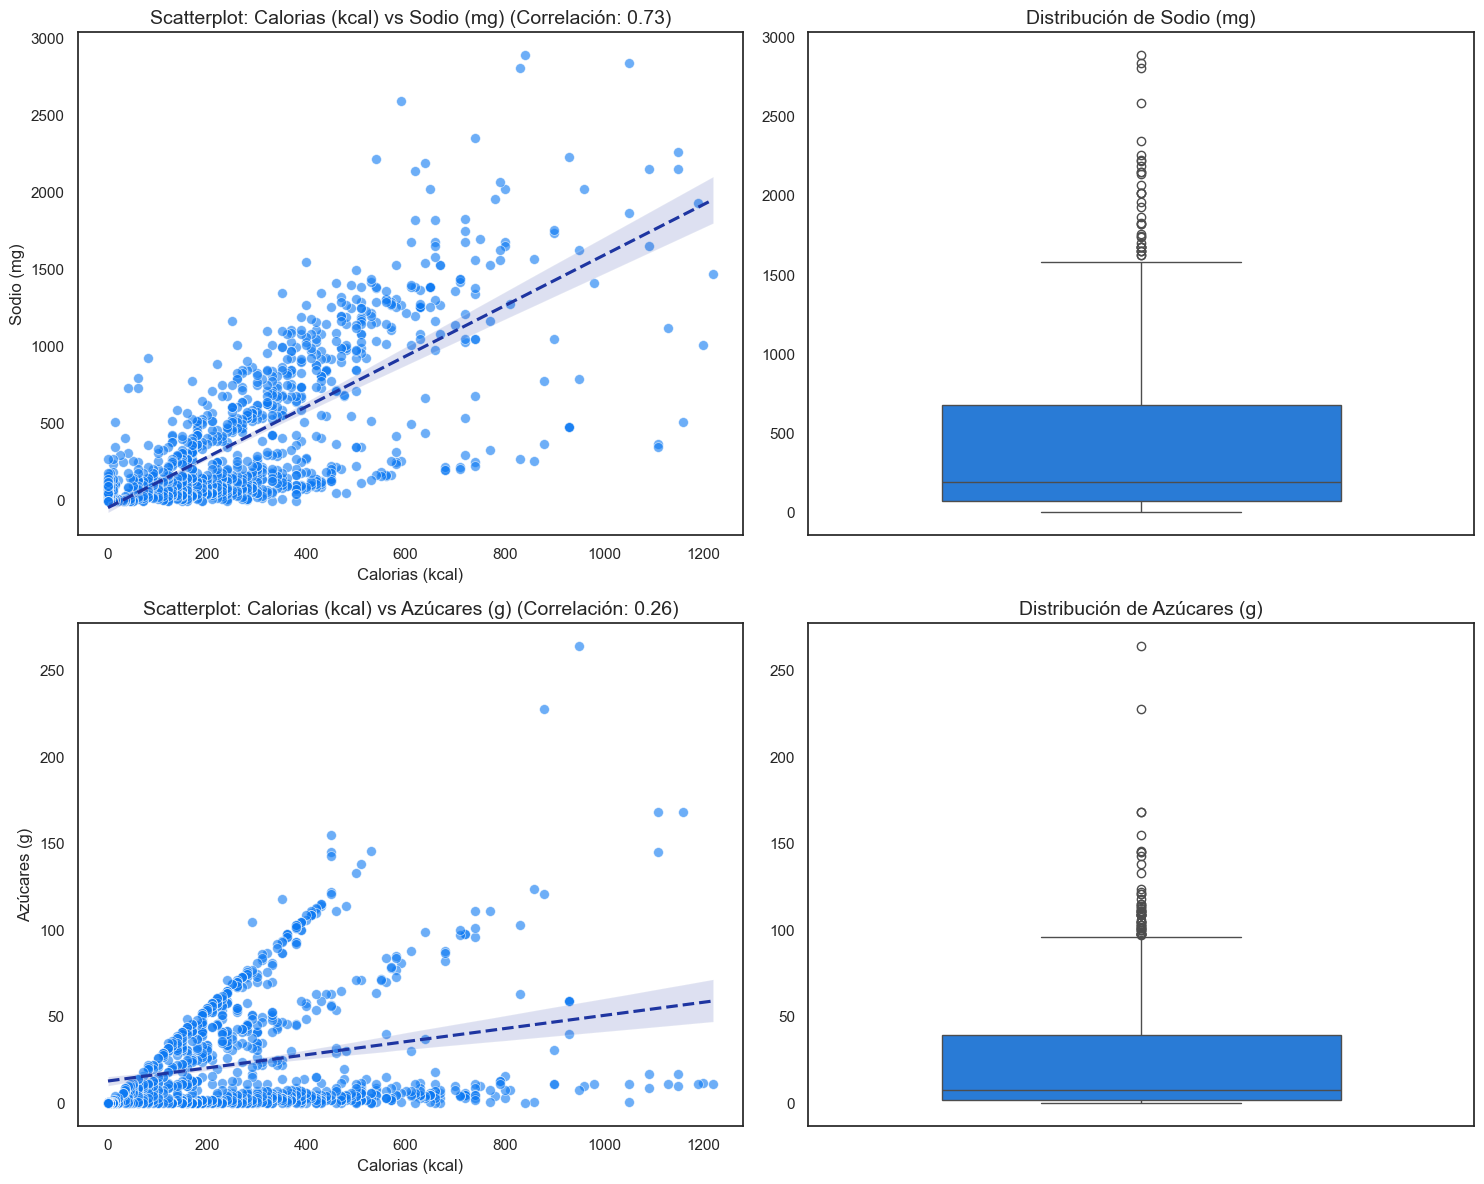

In [14]:
# Configurar la figura y ejes
fig, ax = plt.subplots(2, 2, figsize=(15, 12))  # 2 filas y 2 columnas
colors = {'scatter': '#6a0dad', 'reg': '#2ca02c'}  # Colores personalizados

# Variables a analizar
variables = [('sodio', 'Sodio (mg)'), ('azucares', 'Azúcares (g)')]

# Generar gráficos para cada variable
for i, var in enumerate(variables):
    plot_corr(df, ('calorias', 'Calorias (kcal)'), var, ax[i], scatter_color=gcolors['medio'], reg_color=gcolors['oscuro'])

# Ajustar el diseño
plt.tight_layout()
plt.savefig("./src/img/calorias_sodio_azucar.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusiones: Heatmap - Relación entre Colesterol y Otros Nutrientes

1. **Grasas Saturadas & Colesterol**
	- **Relación Positiva Moderada**: Existe una correlación positiva moderada (**0.63**) entre **grasas saturadas** y **colesterol**, lo que sugiere que un mayor contenido de grasas saturadas está asociado con niveles más altos de colesterol.
	- **Implicación**: Alimentos con mayor grasa saturada suelen ser más propensos a tener niveles elevados de colesterol, lo cual refuerza su impacto significativo en la dieta.

2. **Grasa Total & Colesterol**
	- **Relación Positiva Moderada**: La **grasa total** muestra una correlación positiva de **0.61** con el colesterol, lo que implica que la cantidad total de grasa también tiene un impacto relevante, aunque ligeramente menor que las grasas saturadas.

3. **Sodio & Colesterol**
	- **Relación Moderada**: Existe una correlación moderada de **0.58** entre el **sodio** y el colesterol. Esto sugiere que alimentos con alto contenido de sodio podrían también contener niveles elevados de colesterol, aunque esta relación es menos directa.

4. **Grasas Trans & Colesterol**
	- **Relación Débil**: La correlación entre **grasas trans** y **colesterol** es baja (**0.33**), indicando que su impacto es menos significativo en comparación con las grasas saturadas y totales.

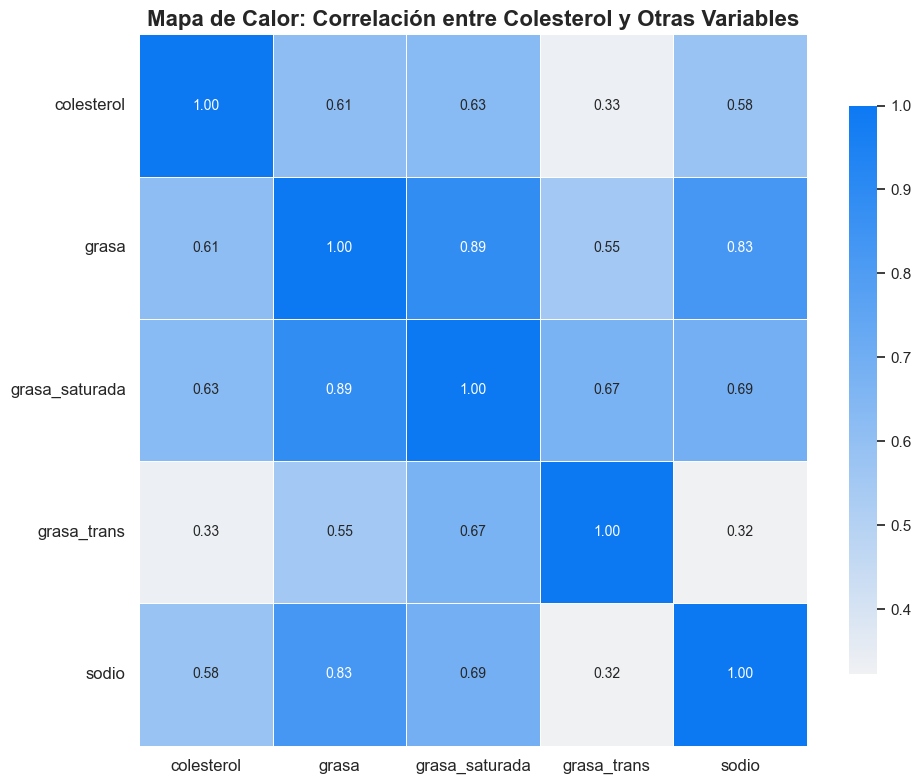

In [15]:
# Calcular la matriz de correlación
variables_interes = ['colesterol', 'grasa', 'grasa_saturada', 'grasa_trans', 'sodio']
correlation_matrix = df[variables_interes].corr()

custom_cmap = sns.light_palette(gcolors['medio'], as_cmap=True)  # Naranja claro

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap=custom_cmap,  # Usar la paleta naranja personalizada
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={'shrink': 0.8},
    annot_kws={'fontsize': 10}
)

# Títulos y etiquetas
plt.title('Mapa de Calor: Correlación entre Colesterol y Otras Variables', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.savefig("./src/img/correlacion_colesterol.png", dpi=300, bbox_inches="tight")

# Mostrar el gráfico
plt.show()

In [16]:
# Filtrar solo comidas
df_comida = df[df['complemento'] == 0]

# Selección de columnas relevantes
variables_salud = ['calorias', 'grasa', 'sodio', 'proteina', 'fibra', 'azucares']
df_salud = df_comida[variables_salud].copy()

# Invertir las columnas donde "menos es mejor" (calorías, grasa, sodio)
df_salud['calorias'] = -df_salud['calorias']
df_salud['grasa'] = -df_salud['grasa']
df_salud['sodio'] = -df_salud['sodio']
df_salud['azucares'] = -df_salud['azucares']

# Escalar las variables entre 0 y 1
scaler = MinMaxScaler()
df_salud_scaled = scaler.fit_transform(df_salud)

# Aplicar PCA
pca = PCA(n_components=len(variables_salud))
pca.fit(df_salud_scaled)

# Obtener la varianza explicada (importancia de cada variable)
pca_importance = pca.components_[0]  # Primera componente principal (la más relevante)
pesos = abs(pca_importance) / abs(pca_importance).sum()  # Normalizar pesos
df_comida['puntuacion'] = df_salud_scaled.dot(pesos)

# Crear una nueva columna combinando 'cadena' y 'producto'
df_comida['titulo'] = df_comida['cadena'] + '\n' + df_comida['producto']

#### Conclusiones: Puntuación Balanceada

1. **Identificación del Balance Nutricional**  
   - La **Puntuación Balanceada** combina criterios clave como **bajas calorías, grasas y sodio**, priorizando también alimentos con **mayor proteína y fibra**.  
   - Destacan productos como el **KENTUCKY GRILLED CHICKEN Breast**, la **House Side Salad** y la **Premium Caesar Salad with Grilled Chicken**, que son opciones equilibradas con bajo contenido calórico y graso y buenas cantidades de proteína.  
   - La lista está dominada por **carnes a la parrilla**, **ensaladas** y opciones vegetales, mostrando que los alimentos con mejor balance nutricional son aquellos más naturales y menos procesados.  

2. **Implicación**  
   - Estos resultados sugieren que para un balance óptimo, es ideal optar por **carnes magras** y **ensaladas**, que aportan proteínas, fibra y bajos niveles de calorías y grasas.

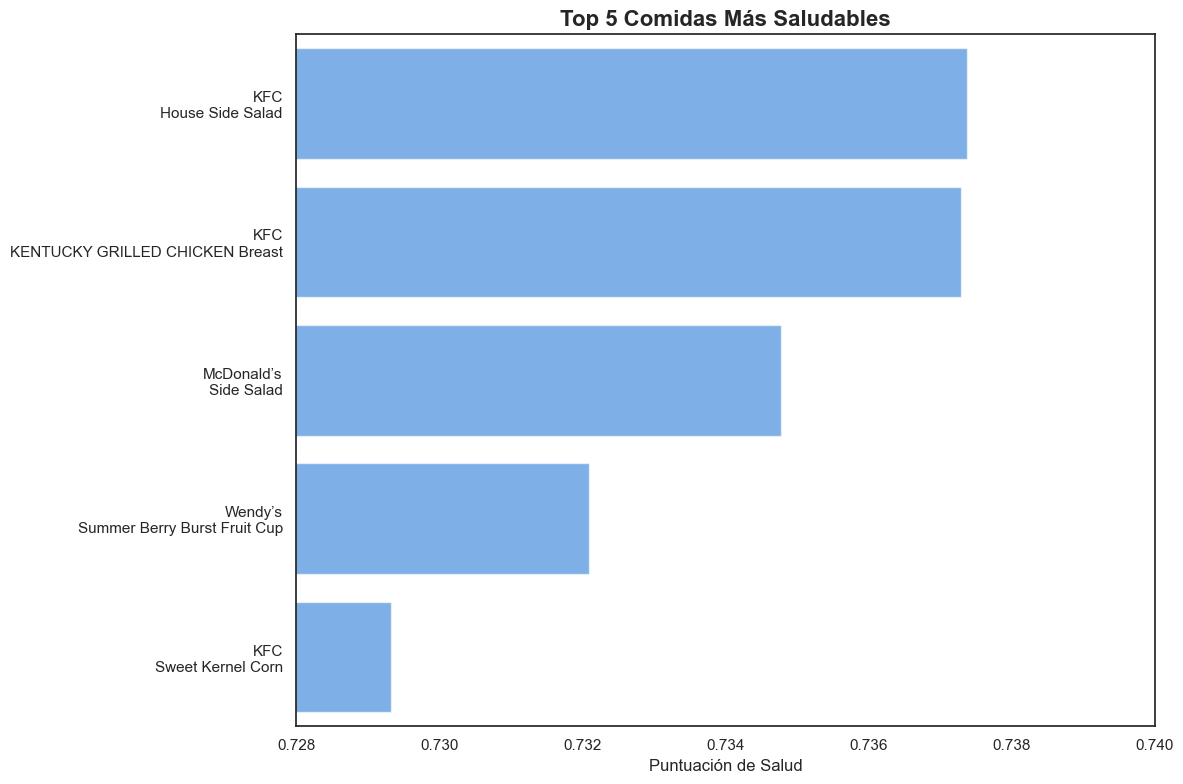

In [17]:
# Ordenar por puntuación de salud
df_top_saludables = df_comida.sort_values(by='puntuacion', ascending=False).head(5)

# Gráfico de barras horizontal
plt.figure(figsize=(12, 8))
sns.barplot(
	x='puntuacion', 
	y='titulo', 
	data=df_top_saludables,
	color=gcolors['medio'], 
	alpha=0.6
)

# Configuración del estilo
plt.title('Top 5 Comidas Más Saludables', fontsize=16, fontweight='bold')
plt.xlabel('Puntuación de Salud', fontsize=12)
plt.ylabel('')

# Ajustar el rango del eje x
plt.xlim(0.728, 0.74)

plt.tight_layout()
plt.savefig("./src/img/balance_comidas.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusiones: Puntos Weight Watchers

1. **Evaluación según Puntos WW**  
   - Los **Puntos Weight Watchers** priorizan alimentos bajos en **calorías, grasas saturadas y sodio**, con un enfoque más estricto en la reducción calórica.  
   - Destacan opciones como la **House Side Salad** y aderezos ligeros como el **Marzetti Light Italian Dressing**, así como acompañamientos frutales como el **Summer Berry Burst Fruit Cup**.  
   - Aquí predominan **ensaladas, salsas bajas en calorías** y **frutas**, con menor presencia de proteínas.

2. **Implicación**  
   - Los puntos WW sugieren que alimentos **bajos en calorías y grasas saturadas**, como ensaladas ligeras y aderezos, son ideales para quienes buscan opciones alineadas con dietas hipocalóricas.

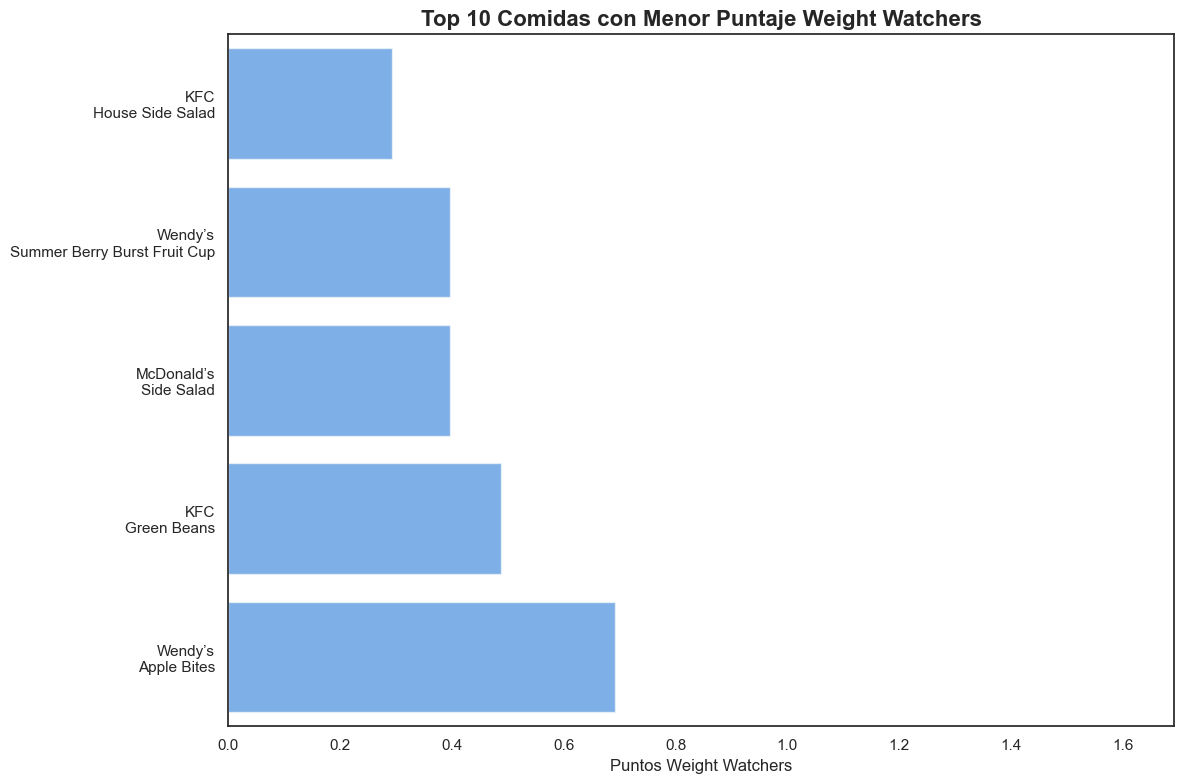

In [18]:
# Ordenar por los puntos WW (de menor a mayor)
df_top_ww = df_comida.sort_values(by='puntos_ww').head(5)

# Gráfico de barras horizontal
plt.figure(figsize=(12, 8))
sns.barplot(
    x='puntos_ww', 
    y='titulo', 
    data=df_top_ww, 
    color=gcolors['medio'], 
    alpha=0.6
)

# Configuración del estilo
plt.title('Top 10 Comidas con Menor Puntaje Weight Watchers', fontsize=16, fontweight='bold')
plt.xlabel('Puntos Weight Watchers', fontsize=12)
plt.ylabel('')

# Ajustar el rango del eje x para mejor visualización
plt.xlim(0, df_top_ww['puntos_ww'].max() + 1)

plt.tight_layout()
plt.savefig("./src/img/balance_comidas_ww.png", dpi=300, bbox_inches="tight")
plt.show()

#### Conclusiones: Relación entre Puntos WW y Puntuación de Salud  

1. **Relación**  
   - No existe una **correlación directa** entre los **puntos WW** y la **puntuación de salud**. Un alimento bajo en puntos WW no siempre tendrá una puntuación de salud alta y viceversa.  

2. **Implicación**  
   - Ambas métricas deberían considerarse para una alimentación **baja en calorías** y **nutritiva**, aunque cada una tenga un "objetivo" distinto.  

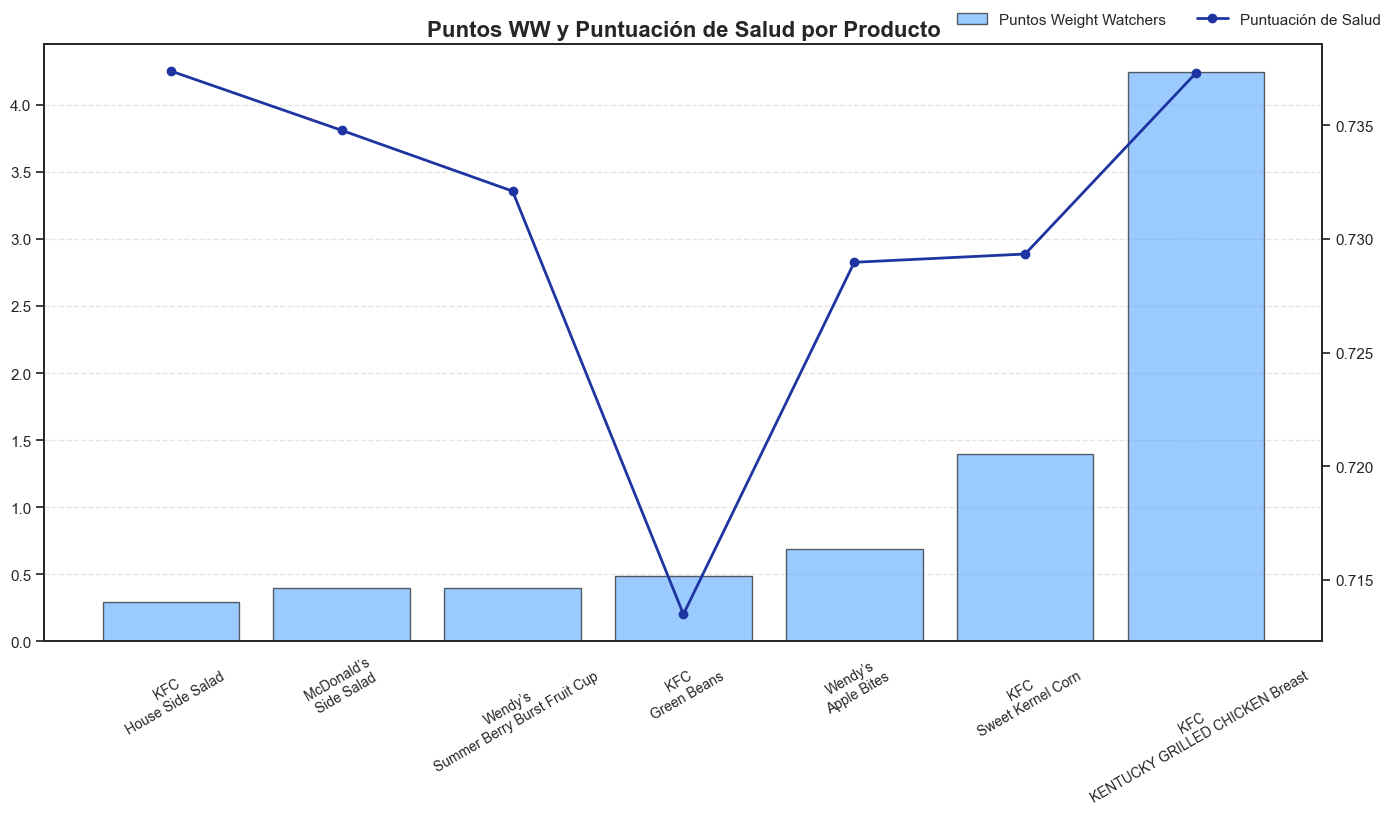

In [19]:
# Unir los datos: Top 5 Saludables y Top 5 WW (asegurando que no se dupliquen)
df_combinado = pd.concat(
    [df_top_saludables[['titulo', 'puntuacion', 'puntos_ww']], 
     df_top_ww[['titulo', 'puntuacion', 'puntos_ww']]]
).drop_duplicates(subset=['titulo']).copy()

# Ordenar por puntos WW para claridad en el eje X
df_combinado = df_combinado.sort_values(by='puntos_ww')

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico de barras: Puntos WW
bars = ax1.bar(
    df_combinado['titulo'], 
    df_combinado['puntos_ww'], 
    color=gcolors['claro'],  # Azul suave
    edgecolor="black",  # Borde negro para destacar
    linewidth=1,
    alpha=0.6, 
    label='Puntos Weight Watchers'
)

# Configurar el eje principal (izquierdo)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', labelrotation=30, labelsize=10)

# Crear un segundo eje Y para la puntuación de saludabilidad
ax2 = ax1.twinx()
ax2.plot(
    df_combinado['titulo'], 
    df_combinado['puntuacion'], 
    color=gcolors['oscuro'],  # Naranja más suave
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    label='Puntuación de Salud'
)

# Configurar el eje secundario (derecho)
ax2.set_ylabel('')
ax2.tick_params(axis='y')

# Mejorar el fondo y el grid
ax1.grid(axis='y', linestyle='--', alpha=0.5)
fig.patch.set_facecolor('white')

# Añadir leyenda combinada
fig.legend(loc='upper right', ncol=2, frameon=False)

# Configuración del título
plt.title('Puntos WW y Puntuación de Salud por Producto', fontsize=16, fontweight='bold')

# Ajustar diseño
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Espacio adicional para las etiquetas
plt.show()